In [ ]:
pip install pandas openpyxl


In [ ]:
import pandas as pd
import sqlite3
from tabulate import tabulate

## importing the xlsx file and turning it into a DB

In [ ]:
#putting file into data frame
TransactionDF = pd.read_excel('/content/transaction_data.xlsx')

#database path
db_path = '/content/transaction_data.db'
conn= sqlite3.connect(db_path)

In [ ]:
#transferring the DF to the DB
table_name = 'Transactions'
TransactionDF.to_sql('Transactions', conn, if_exists='replace', index=False)


#create a cursor object
cursor = conn.cursor()

#execute the query
cursor.execute("SELECT * FROM Transactions")

#fetch the results
rows = cursor.fetchall()
columns = [description[0] for description in cursor.description]
print(tabulate(rows[:10], headers=columns, tablefmt="psql"))




+---------------+---------------------+---------------+----------+------------------+-------------+------------+-----------------+---------------+---------------------+-----------+------------------+----------------------+----------------------+--------------+-----------+
|   Transaction | Purchase Date       |   Customer ID | Gender   | Marital Status   | Homeowner   |   Children | Annual Income   | City          | State or Province   | Country   | Product Family   | Product Department   | Product Category     |   Units Sold |   Revenue |
|---------------+---------------------+---------------+----------+------------------+-------------+------------+-----------------+---------------+---------------------+-----------+------------------+----------------------+----------------------+--------------+-----------|
|             1 | 2014-12-18 00:00:00 |          7223 | F        | S                | Y           |          2 | $30K - $50K     | Los Angeles   | CA                  | USA       | 

In [ ]:
#Find the data types of the columns
cursor.execute("PRAGMA table_info(Transactions)")
rows = cursor.fetchall()
columns = [description[0] for description in cursor.description]
print( tabulate(rows, headers=columns, tablefmt="psql"))


+-------+--------------------+---------+-----------+--------------+------+
|   cid | name               | type    |   notnull | dflt_value   |   pk |
|-------+--------------------+---------+-----------+--------------+------|
|     0 | Transaction        | INTEGER |         0 |              |    0 |
|     1 | Purchase Date      | TEXT    |         0 |              |    0 |
|     2 | Customer ID        | INTEGER |         0 |              |    0 |
|     3 | Gender             | TEXT    |         0 |              |    0 |
|     4 | Marital Status     | TEXT    |         0 |              |    0 |
|     5 | Homeowner          | TEXT    |         0 |              |    0 |
|     6 | Children           | INTEGER |         0 |              |    0 |
|     7 | Annual Income      | TEXT    |         0 |              |    0 |
|     8 | City               | TEXT    |         0 |              |    0 |
|     9 | State or Province  | TEXT    |         0 |              |    0 |
|    10 | Country        

## Creating the customers table

In [ ]:
#creating a new  Customers Table based on the columns from the Transaction Table
db_path = '/content/transaction_data.db'
conn = sqlite3.connect(db_path)
cursor = conn.cursor()
print("Opened database successfully") #success message

existingTable ='Transactions'
columnsToPull= ['"Customer ID"','Gender','"Marital Status"','Homeowner', 'Children']

query = f"""
SELECT {', '.join(columnsToPull)}
FROM {existingTable}
"""

df= pd.read_sql_query(query, conn)

# Drop the Customers table if it exists
cursor.execute("DROP TABLE IF EXISTS Customers")

# Create the Customers table
cursor.execute("""
CREATE TABLE Customers (
    "Customer ID" INTEGER PRIMARY KEY,
    Gender TEXT CHECK(LENGTH(Gender) = 1),
    "Marital Status" TEXT CHECK(LENGTH("Marital Status") = 1),
     Homeowner TEXT CHECK(LENGTH(Homeowner) = 1),
    Children INTEGER
)
""")

# Remove duplicate customer IDs before inserting
df_unique = df.drop_duplicates(subset='Customer ID', keep='first')

# Insert data from the DataFrame into the Customers table
df_unique.to_sql('Customers', conn, if_exists='append', index=False)

cursor.execute("SELECT * FROM Customers")
rows = cursor.fetchall()
columns = [description[0] for description in cursor.description]
print(tabulate(rows[:20], headers=columns, tablefmt="psql"))

Opened database successfully
+---------------+----------+------------------+-------------+------------+
|   Customer ID | Gender   | Marital Status   | Homeowner   |   Children |
|---------------+----------+------------------+-------------+------------|
|             3 | F        | M                | Y           |          1 |
|             8 | M        | M                | Y           |          2 |
|             9 | M        | M                | Y           |          5 |
|            20 | F        | S                | Y           |          2 |
|            24 | F        | S                | N           |          0 |
|            26 | M        | S                | N           |          0 |
|            28 | F        | S                | Y           |          1 |
|            30 | F        | S                | Y           |          4 |
|            32 | F        | S                | Y           |          2 |
|            36 | M        | S                | N           |          

In [ ]:
#print first 10 rows from the table with table header using pandas
print(tabulate(rows[:10], headers=columns, tablefmt="psql"))

+---------------+----------+------------------+-------------+------------+
|   Customer ID | Gender   | Marital Status   | Homeowner   |   Children |
|---------------+----------+------------------+-------------+------------|
|             3 | F        | M                | Y           |          1 |
|             8 | M        | M                | Y           |          2 |
|             9 | M        | M                | Y           |          5 |
|            20 | F        | S                | Y           |          2 |
|            24 | F        | S                | N           |          0 |
|            26 | M        | S                | N           |          0 |
|            28 | F        | S                | Y           |          1 |
|            30 | F        | S                | Y           |          4 |
|            32 | F        | S                | Y           |          2 |
|            36 | M        | S                | N           |          1 |
+---------------+--------

In [ ]:
#Find the data types of the columns
cursor.execute("PRAGMA table_info(Customers)")
conn.commit()  # Commit the changes to the database

rows = cursor.fetchall()
columns = [description[0] for description in cursor.description]
print( tabulate(rows, headers=columns, tablefmt="psql"))

conn.close()

+-------+----------------+---------+-----------+--------------+------+
|   cid | name           | type    |   notnull | dflt_value   |   pk |
|-------+----------------+---------+-----------+--------------+------|
|     0 | Customer ID    | INTEGER |         0 |              |    1 |
|     1 | Gender         | TEXT    |         0 |              |    0 |
|     2 | Marital Status | TEXT    |         0 |              |    0 |
|     3 | Homeowner      | TEXT    |         0 |              |    0 |
|     4 | Children       | INTEGER |         0 |              |    0 |
+-------+----------------+---------+-----------+--------------+------+


## Creating customers salary table

In [ ]:
db_path = '/content/transaction_data.db'
conn = sqlite3.connect(db_path)
cursor = conn.cursor()
print("Opened database successfully") #success message

existingTable = 'Transactions'
columnsToPull = ['"Customer ID"','"Annual Income"','City','"State Or Province"']

query=f"""
SELECT {','.join(columnsToPull)}
FROM {existingTable}
"""
df = pd.read_sql_query(query, conn)

cursor.execute("DROP TABLE IF EXISTS 'Customer Salary'")

cursor.execute("""
CREATE TABLE "Customer Salary" (
    "Customer ID" INTEGER PRIMARY KEY,
    "Annual Income" INTEGER,
    City Text,
    "State Or Province" Text
)
""")

# Make sure df_unique only has columns that match the table
df_unique = df.drop_duplicates(subset='Customer ID', keep='first')
df_unique.to_sql('Customer Salary', conn, if_exists='append', index=False)

cursor.execute("SELECT * FROM 'Customer Salary'")
rows = cursor.fetchall()
columns = [description[0] for description in cursor.description]
print(tabulate(rows[:10], headers=columns, tablefmt="psql"))



Opened database successfully
+---------------+-----------------+---------------+---------------------+
|   Customer ID | Annual Income   | City          | State Or Province   |
|---------------+-----------------+---------------+---------------------|
|             3 | $50K - $70K     | Seattle       | WA                  |
|             8 | $50K - $70K     | San Andres    | DF                  |
|             9 | $10K - $30K     | Vancouver     | BC                  |
|            20 | $10K - $30K     | San Diego     | CA                  |
|            24 | $30K - $50K     | San Andres    | DF                  |
|            26 | $10K - $30K     | Beverly Hills | CA                  |
|            28 | $10K - $30K     | Seattle       | WA                  |
|            30 | $50K - $70K     | Portland      | OR                  |
|            32 | $10K - $30K     | Vancouver     | BC                  |
|            36 | $10K - $30K     | Portland      | OR                  |
+--------

In [ ]:
#Find the data types of the columns
cursor.execute("PRAGMA table_info('Customer Salary')")
rows = cursor.fetchall()
columns = [description[0] for description in cursor.description]
print( tabulate(rows, headers=columns, tablefmt="psql"))


+-------+-------------------+---------+-----------+--------------+------+
|   cid | name              | type    |   notnull | dflt_value   |   pk |
|-------+-------------------+---------+-----------+--------------+------|
|     0 | Customer ID       | INTEGER |         0 |              |    1 |
|     1 | Annual Income     | INTEGER |         0 |              |    0 |
|     2 | City              | TEXT    |         0 |              |    0 |
|     3 | State Or Province | TEXT    |         0 |              |    0 |
+-------+-------------------+---------+-----------+--------------+------+


In [ ]:
conn.close()

## Product Table

In [ ]:
#setting up DB connection
db_path = 'transaction_data.db'
conn = sqlite3.connect(db_path)
cursor = conn.cursor()
print("Opened database successfully") #success message

existingTable= 'Transactions'
columnsToPull = ['"Product Family"', '"Product Department"', '"Product Category"']



query = f"""
SELECT {','.join(columnsToPull)}
FROM {existingTable}
"""
df= pd.read_sql_query(query,conn)

# Drop the Customers table if it exists
cursor.execute("DROP TABLE IF EXISTS Product")

# Create the Customers table
cursor.execute("""
CREATE TABLE Product (
    'Product Family' TEXT PRIMARY KEY,
    'Product Department' TEXT,
    'Product Category' TEXT
)
""")

# Remove duplicate customer IDs before inserting
df_unique = df.drop_duplicates(subset='Product Family', keep='first')

# Insert data from the DataFrame into the Customers table
df_unique.to_sql('Product', conn, if_exists='append', index=False)

cursor.execute("SELECT * FROM Product")
rows = cursor.fetchall()
columns = [description[0] for description in cursor.description]
print(tabulate(rows[:10], headers=columns, tablefmt="psql"))


Opened database successfully
+------------------+----------------------+----------------------+
| Product Family   | Product Department   | Product Category     |
|------------------+----------------------+----------------------|
| Food             | Snack Foods          | Snack Foods          |
| Drink            | Beverages            | Carbonated Beverages |
| Non-Consumable   | Household            | Cleaning Supplies    |
+------------------+----------------------+----------------------+


In [ ]:
#Find the data types of the columns
cursor.execute("PRAGMA table_info(Product)")
rows = cursor.fetchall()
columns = [description[0] for description in cursor.description]
print( tabulate(rows, headers=columns, tablefmt="psql"))

+-------+--------------------+--------+-----------+--------------+------+
|   cid | name               | type   |   notnull | dflt_value   |   pk |
|-------+--------------------+--------+-----------+--------------+------|
|     0 | Product Family     | TEXT   |         0 |              |    1 |
|     1 | Product Department | TEXT   |         0 |              |    0 |
|     2 | Product Category   | TEXT   |         0 |              |    0 |
+-------+--------------------+--------+-----------+--------------+------+


In [ ]:
conn.close()

## Transaction table

In [ ]:
db_path = '/content/transaction_data.db'
conn = sqlite3.connect(db_path)
cursor = conn.cursor()
print("Opened database successfully") #success message

existingTable= 'Transactions'
columnsToPull= ['"Customer ID"','"Product Family"','"Units Sold"','Revenue', '"Purchase Date"']

query = f"""
SELECT {','.join(columnsToPull)}
FROM {existingTable}
"""
df = pd.read_sql_query(query, conn)


cursor.execute("DROP TABLE IF EXISTS 'Customer Transactions'")

cursor.execute("""
CREATE TABLE "Customer Transactions" (
    "Customer ID" INTEGER,
    "Product Family" Text,
    "Units Sold" INTEGER,
    Revenue INTEGER,
    "Purchase Date" Date,
    FOREIGN KEY("Customer ID") REFERENCES Transactions("Customer ID"),
    FOREIGN KEY("Product Family") REFERENCES Product("Product Family")
)
""")

#print the first 10 lines from the table
df_unique = df.drop_duplicates(subset='Customer ID', keep='first')
df_unique.to_sql('Customer Transactions', conn, if_exists='append', index=False)

cursor.execute("SELECT * FROM 'Customer Transactions'")
rows = cursor.fetchall()
columns = [description[0] for description in cursor.description]
print(tabulate(rows[:10], headers=columns, tablefmt="psql"))



Opened database successfully
+---------------+------------------+--------------+-----------+---------------------+
|   Customer ID | Product Family   |   Units Sold |   Revenue | Purchase Date       |
|---------------+------------------+--------------+-----------+---------------------|
|          7223 | Food             |            5 |     27.38 | 2014-12-18 00:00:00 |
|          7841 | Food             |            5 |     14.9  | 2014-12-20 00:00:00 |
|          8374 | Food             |            3 |      5.52 | 2014-12-21 00:00:00 |
|          9619 | Food             |            4 |      4.44 | 2014-12-21 00:00:00 |
|          1900 | Drink            |            4 |     14    | 2014-12-22 00:00:00 |
|          6696 | Food             |            3 |      4.37 | 2014-12-22 00:00:00 |
|          9673 | Food             |            4 |     13.78 | 2014-12-23 00:00:00 |
|           354 | Food             |            6 |      7.34 | 2014-12-25 00:00:00 |
|          1293 | Non-Con

In [ ]:
#Find the data types of the columns
cursor.execute("PRAGMA table_info('Customer Transactions')")
rows = cursor.fetchall()
columns = [description[0] for description in cursor.description]
print( tabulate(rows, headers=columns, tablefmt="psql"))

+-------+----------------+---------+-----------+--------------+------+
|   cid | name           | type    |   notnull | dflt_value   |   pk |
|-------+----------------+---------+-----------+--------------+------|
|     0 | Customer ID    | INTEGER |         0 |              |    0 |
|     1 | Product Family | TEXT    |         0 |              |    0 |
|     2 | Units Sold     | INTEGER |         0 |              |    0 |
|     3 | Revenue        | INTEGER |         0 |              |    0 |
|     4 | Purchase Date  | Date    |         0 |              |    0 |
+-------+----------------+---------+-----------+--------------+------+


In [ ]:
conn.close()

## Bar chart to show salary


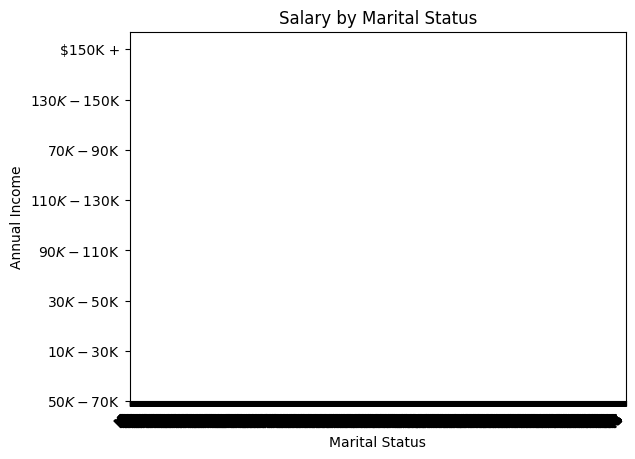

In [ ]:
conn= sqlite3.connect('/content/transaction_data.db')
cursor = conn.cursor()

query = """
SELECT Customers.'Marital Status', 'Customer Salary'.'Annual Income'
FROM  Customers
JOIN  'Customer Salary' ON Customers.'Customer ID' = 'Customer Salary'.'Customer ID'
"""

# Execute the query
cursor.execute(query)
results = cursor.fetchall()

# create a bar chart
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.bar([row[0] for row in results], [row[1] for row in results])

# Set the x-axis labels
x_labels = [row[0] for row in results]
ax.set_xticks(range(len(x_labels)))
ax.set_xticklabels(x_labels, rotation=45, ha='right')

# Set the chart title and axis labels
ax.set_title('Salary by Marital Status')
ax.set_xlabel('Marital Status')
ax.set_ylabel('Annual Income')

# Show the chart
plt.show()